# Fitting tool

It optimises the fit to the data points with the scipy.optimize.curve_fit function, which uses non-linear least squares to fit the function f to the data.

In [2]:
# First define the function to which the data should be fitted and import all the needed python functions.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f_cv(tau, factor, a, const):
    return factor*abs(tau)**(-a) + const
# in which tau = T-T_c

def f_test(x, a, b, c):
    return a*np.exp(-b*x) + c

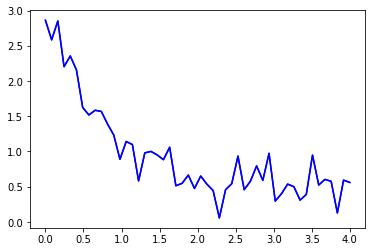

In [5]:
# Define test data (with noise)

xdata = np.linspace(0, 4, 50)
y = f_test(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
plt.show()

In [ ]:
# Apply the fit
#(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
popt, pcov = curve_fit(f_test, xdata, ydata)